In [1]:
from matplotlib import pyplot as plt
import sys, pickle
# include the directory with libraries in the pythonpath
sys.path.insert(0,"libs")

# import local libraries
from visualizations import *
from utils import *

In [21]:
n=10
p=0.1
nns = [expectedNodeNumber(n,p,k) for k in range(n+1)]

(0.0, 20.0)

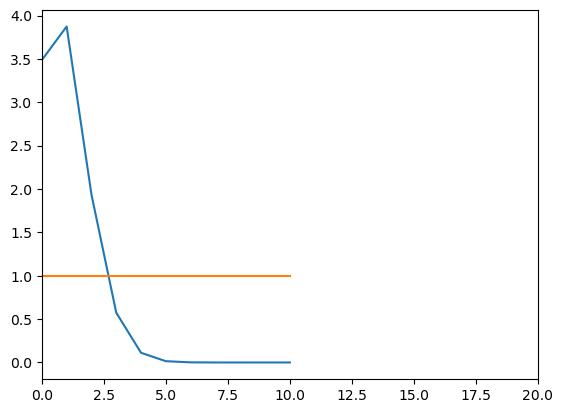

In [22]:
plt.plot(nns)
plt.plot(np.arange(len(nns)), np.ones(len(nns)))
plt.xlim([0,20])

In [36]:
data = np.zeros((100,100))
data2 = np.zeros((100,100))
for i_n, n in enumerate(range(100)):
    for i_p, p in enumerate(np.arange(0,1,0.01)):
        
        data[i_n, i_p] = p*(n-1)*n-2*expectedMaxDegree(n,p)
        
        if n > 2:
            #print(data[i_n, i_p], data[i_n, i_p]/(n-2)/(n-1))
            data2[i_n, i_p] = data[i_n, i_p]/(n-2)/(n-1)
        else:
            data2[i_n, i_p] = 0

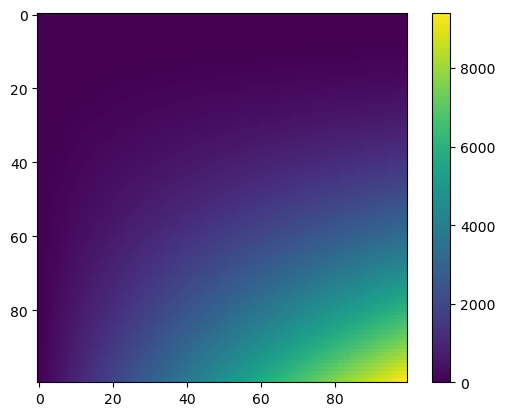

In [37]:
plt.imshow(data)
plt.colorbar()

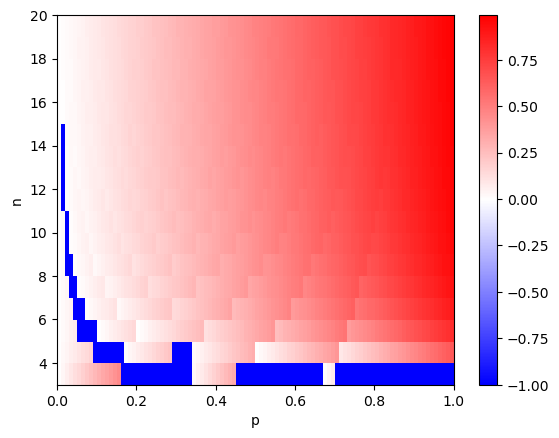

In [58]:
data3 = np.copy(data2)
data3[data2<0]=-1
#data3[50]=-1
plt.imshow(data3, cmap='bwr', extent=[0,1,100,0], aspect='auto')
plt.xlabel('p')
plt.ylabel('n')
plt.ylim([3,20])
plt.colorbar()

Problems occur when n<= 15 for some specific range of p values

## Possible solution for small graphs
Use $P(n,m,k)$ to denote the probability that a given node --- let's say the first node --- in a $G(n,m)$ graph has degree $k$:
$$P(n,m,k)=\frac{\binom{n-1}{k}\binom{\binom{n}{2}-(n-1)}{m-k}}{\binom{\binom{n}{2}}{m}}=\frac{\binom{n-1}{k}\binom{\binom{n-1}{2}}{m-k}}{\binom{\binom{n}{2}}{m}}$$

In [16]:
import numpy as np
import networkx as nx
from scipy.special import comb as C
from scipy.special import binom
import itertools as it

In [13]:
def p_node_has_degree_k(n,m,k):
    out = binom(binom(n-1,2),m-k)/binom(binom(n,2),m)*binom(n-1,k)
    return out

def sim_p_node_has_degree_k(n,m,k, tries=10000):
    has_degree_k = [(nx.gnm_random_graph(n, m)).degree[0]==k for i in range(tries)]
    return np.sum(has_degree_k)/tries

In [15]:
n=7
for m in range(n):
    for k in range(m):
        p1 = p_node_has_degree_k(n,m,k)
        p2 = sim_p_node_has_degree_k(n,m,k)
        print(n,m,k, p1, p2, p1-p2)

7 1 0 0.7142857142857143 0.7137 0.0005857142857143005
7 2 0 0.5 0.5038 -0.0038000000000000256
7 2 1 0.42857142857142855 0.4307 -0.0021285714285714796
7 3 0 0.34210526315789475 0.3387 0.0034052631578947445
7 3 1 0.47368421052631576 0.4691 0.004584210526315746
7 3 2 0.16917293233082706 0.1681 0.0010729323308270589
7 4 0 0.22807017543859648 0.2298 -0.0017298245614035257
7 4 1 0.45614035087719296 0.4606 -0.004459649122807052
7 4 2 0.2631578947368421 0.2563 0.006857894736842118
7 4 3 0.05012531328320802 0.0497 0.00042531328320801615
7 5 0 0.1475748194014448 0.1506 -0.0030251805985552216
7 5 1 0.4024767801857585 0.4067 -0.004223219814241508
7 5 2 0.3353973168214654 0.3391 -0.003702683178534616
7 5 3 0.10319917440660475 0.0976 0.005599174406604748
7 5 4 0.011057054400707651 0.0099 0.0011570544007076505
7 6 0 0.092234262125903 0.0925 -0.0002657378740970051
7 6 1 0.3320433436532508 0.3302 0.001843343653250784
7 6 2 0.3773219814241486 0.3723 0.005021981424148558
7 6 3 0.16769865841073273 0.1714 

Use $P(n,m,[k_1,k])$ to denote the probability that a second node in a $G(n,m)$ graph has degree $k$ given that the first node has degree $k_1$.

* Scenario 1: Node 2 is not connected to node 1
$$P(n,m,[k_1,k])=P(n-1,m-k_1,k)$$
This scenario happens with probability $1-k_1/(n-1)$ if node 2 is chosen uniformly at random.

* Scenario 2: Node 2 is connected to node 1
$$P(n,m,[k_1,k]) = P(n-1,m-k_1,k-1)$$
This scenario happens with probability $k_1/(n-1)$ if node 2 is chosen uniformly at random.

It follows that 
$$P(n,m,[k_1,k]) = \frac{k_1}{n-1}P(n-1,m-k_1,k-1)+\left(1-\frac{k_1}{n-1}\right)P(n-1,m-k_1,k)$$

$$\frac{\binom{\binom{n-2}{2}}{m-k_1-k}}{\binom{\binom{n-1}{2}}{m-k_1}}
$$

This seems to become very difficult very quickly. Let's try something else.

Use $P_S(n,m,k)$ that a $G(n,m)$ graph, when randomly split into two subgraphs has $k$ edges that connect these two subgraphs:
$$P_S(n,m,k)=\frac{1}{\binom{\binom{n}{2}}{m}}\sum_{n_1=1}^{n-1}\sum_{m_1=0}^{m-k}\binom{\binom{n_1}{2}}{m}\binom{\binom{n-n_1}{2}}{m-m_1-k}\binom{n_1(n-n_1)}{k}$$

If we are only interested in subsets of size 1 (and thus $m_1=0$):
$$P_{S_1}(n,m,k)=\frac{1}{\binom{\binom{n}{2}}{m}}\binom{\binom{1}{2}}{0}\binom{\binom{n-1}{2}}{m-k}\binom{n-1}{k}$$
$$=\frac{1}{\binom{\binom{n}{2}}{m}}\binom{\binom{n-1}{2}}{m-k}\binom{n-1}{k}$$

Is $P_{S_1}(n,m,k)$ the same as the probability that a randomly chosen node has degree $k$?


In [121]:
def ps(n,m,k):
    prob = 0
    for n1 in range(1,n):
        for m1 in range(m-k+1):
            prob += binom(binom(n1,2),m)*binom(binom(n-n1,2),m-m1-k)/binom(binom(n,2),m)*binom(n1*(n-n1),k)
    return prob            

def ps1(n,m,k):
    prob = binom(binom(n-1,2),m-k)/binom(binom(n,2),m)*binom(n-1,k)
    return prob            

In [124]:
n=5
for m in range(1,5):
    for k in range(1,4):
        print(ps(n,m,k), ps1(n,m,k))

4.8 0.4
0 0.0
0 0.0
2.1333333333333333 0.5333333333333333
3.0 0.13333333333333333
0 0.0
0.7666666666666666 0.5
1.25 0.30000000000000004
0.8333333333333333 0.03333333333333333
0.2857142857142857 0.38095238095238093
0.42857142857142855 0.42857142857142855
0.2857142857142857 0.11428571428571428


In [116]:
# get exact probabilities by enumerating all possible graphs

def enumerate_adjacency_matrices(n,m):
    places = int(binom(n,2))
    elements = [True]*m+[False]*(places-m)
    permutations = list(set(list(it.permutations(elements, places))))
    mats = [np.zeros((n,n), dtype=bool) for i in range(len(permutations))]
    inds = np.triu_indices(n, k=1)
    for i in range(len(permutations)):
        mats[i][inds]=permutations[i]
        mats[i] += (mats[i]).T
        
    return mats
            
def enumerate_graphs(n,m):
    out = [nx.from_numpy_array(A) for A in enumerate_adjacency_matrices(n,m)]
    return out      

def get_probability(n, m, condition):
    # condition should be a boolean function of a graph G
    
    graphs = enumerate_graphs(n,m)
    count = np.sum([condition(G) for G in graphs])
    prob = count/len(graphs)
    
    return prob

def prob_k_split(n,m,k):
    # probability that G(n,m) graph can be split into two subgraphs 
    # that are connected by k edges
    
    def condition(G):
        A = nx.to_numpy_array(G)
        n_ = len(A)
        # partition
        node_list = range(n_)
        subsets = []
        for size in range(1,n_//2+1):
            subsets += list(it.combinations(node_list, size))
            
        count = 0
        for s in subsets:
            set1 = list(s)
            set2 = [num for num in range(n_) if num not in set1]
            #print('set1', set1)
            #print('set2', set2)
            #print('A[set1]', A[set1])
            num_cross_edges = np.sum(A[set1][:,set2])        
            if num_cross_edges==k:
                count += 1
                
        return count/len(subsets)
    
    p = get_probability(n, m, condition)
    
    return p
    
def prob_node1_degree(n,m,k):
    # probability that the first node in a G(n,m) graph has degree k
    
    def condition(G):
        return G.degree[0]==k
    
    p = get_probability(n, m, condition)
    
    return p
    
def prob_degree(n,m,k):
    # probability that G(n,m) graph has a node with degree at least k
    
    def condition(G):
        degree_sequence = [t[1] for t in G.degree]
        return(max(degree_sequence)>=k)
    
    p = get_probability(n, m, condition)
    
    return p
    
def prob_max_degree(n,m,k):
    # probability that G(n,m) graph has max degree k
    
    def condition(G):
        degree_sequence = [t[1] for t in G.degree]
        return(max(degree_sequence)==k)

    p = get_probability(n, m, condition)
    
    return p


In [97]:
prob_degree(5,5,4)

0.11904761904761904

In [98]:
prob_node1_degree(5,5,2)

0.47619047619047616

In [120]:
prob_k_split(5,5,0)

0.007936507936507936

# Alternative: Using independent draws from a binomial distribution

In [176]:
from scipy.stats import binom as binomial_distribution
import time

4.621945494615035


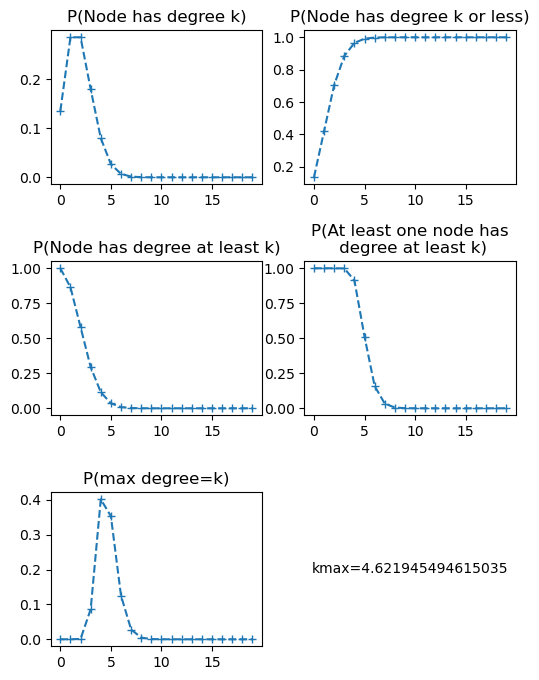

In [240]:
n = 20
p = 0.1

plt.figure(figsize=(6,8))

plt.subplot(321)
plt.title('P(Node has degree k)')
# choose neighbours out of n-1 nodes with probability p
probs_degree_k = np.array([binomial_distribution.pmf(k,n-1,p) for k in range(n)])
plt.plot(probs_degree_k, '--+')

plt.subplot(322)
plt.title('P(Node has degree k or less)')
probs_k_or_less = np.array([binomial_distribution.cdf(k,n-1,p) for k in range(n)])
plt.plot(probs_k_or_less, '--+')

plt.subplot(323)
plt.title('P(Node has degree at least k)')
#probs_at_least_k = np.array(probs_k_or_less[::-1])
# probability of at least degree 0 is 1
probs_at_least_k = np.concatenate([[1],np.array(1-probs_k_or_less[:-1])])
plt.plot(probs_at_least_k, '--+')

plt.subplot(324)
plt.title('P(At least one node has\n degree at least k)')
probs_at_least_one_node = 1-(1-probs_at_least_k)**n
plt.plot(probs_at_least_one_node, '--+')

plt.subplot(325)
plt.title('P(max degree=k)')
# degree can't be larger than n-1
probs_at_least_one_node = np.concatenate([probs_at_least_one_node, [0]])
probs_kmax = probs_at_least_one_node[:-1]-probs_at_least_one_node[1:]
plt.plot(probs_kmax, '--+')

mean_k_max = np.sum([probs_kmax[k]*k for k in range(n)])
print(mean_k_max)
ax = plt.subplot(326)
ax.axis('off')
ax.text(0.5, 0.5, 'kmax='+str(mean_k_max), ha='center', va='center')
ax.set_xlim([0,1])
ax.set_ylim([0,1])

plt.subplots_adjust(hspace=0.5)

In [204]:
n=2
p=0.1
probs_k_or_less = np.array([binomial_distribution.cdf(k,n-1,p) for k in range(n)])
print(probs_k_or_less)

[0.9 1. ]


In [361]:
# as a function
def get_expected_maximum_degree(n,p):
    
    if n in [0,1] or p==0:
        return 0
    
    if n==2:
        return p

    k_max = n
    mean_k_max = 0
    if True: #while np.abs(k_max - mean_k_max)>0.001:
        #print(k_max, mean_k_max)
        k_max = mean_k_max
        probs_k_or_less = np.array([binomial_distribution.cdf(k,n-1,p) for k in range(n)])
        #print('probs_k_or_less', probs_k_or_less)
        probs_at_least_k = np.concatenate([[1],np.array(1-probs_k_or_less[:-1])])
        #print('probs_at_least_k', probs_at_least_k)
        probs_at_least_k = np.cumsum([binomial_distribution.pmf(k,n-1,p) for k in range(n)][::-1])[::-1]
        #print('probs_at_least_k2', probs_at_least_k)
        #print('n-k_max', n-k_max)
        #print('probs_at_least_k[0]', probs_at_least_k[0])
        probs_at_least_one_node = 1-(1-probs_at_least_k)**(n-k_max)
        #probs_at_least_one_node[0] = 1
        #print('probs_at_least_one_node[1]', probs_at_least_one_node[1])
        #probs_at_least_one_node[1] = 1-binomial_distribution.pmf(0,n*(n-1)/2,p) # chance of having no edges
        #print('probs_at_least_one_node[1] v2', probs_at_least_one_node[1])
        #print('probs_at_least_one_node', probs_at_least_one_node)
        probs_at_least_one_node = np.concatenate([probs_at_least_one_node, [0]])
        probs_kmax = probs_at_least_one_node[:-1]-probs_at_least_one_node[1:]
        #print(list(zip(range(n),probs_kmax)))
        mean_k_max = np.sum([probs_kmax[k]*k for k in range(n)])
        #print(mean_k_max)
    
    return mean_k_max

# as a function
def get_expected_maximum_degree2(n,p):
    
    if n in [0,1] or p==0:
        return 0
    
    if n==2:
        return p

    probs_k_or_less = np.array([binomial_distribution.cdf(k,n-1,p) for k in range(n)])
    probs_at_least_k = np.concatenate([[1],np.array(1-probs_k_or_less[:-1])])
    probs_at_least_k = np.cumsum([binomial_distribution.pmf(k,n-1,p) for k in range(n)][::-1])[::-1]
    probs_at_least_one_node = 1-(1-probs_at_least_k)**(n-k_max)
    
    # every node has at least degree zero
    probs_at_least_one_node[0] = 1 
    # at least one node has degree 1 if the graph is not empty
    probs_at_least_one_node[1] = 1-binomial_distribution.pmf(0,n*(n-1)/2,p) 
    
    probs_at_least_one_node = np.concatenate([probs_at_least_one_node, [0]])
    probs_kmax = probs_at_least_one_node[:-1]-probs_at_least_one_node[1:]
    mean_k_max = np.sum([probs_kmax[k]*k for k in range(n)])
    
    return mean_k_max

In [360]:
get_expected_maximum_degree(10,0.1)

probs_at_least_one_node[1] 0.9999238226519541
probs_at_least_one_node[1] v2 0.9912720364319123


2.422802382044398

In [207]:
def sim_maximum_degree(n,p, tries=1000):
    if n==0 or p==0:
        return 0
    mds = np.zeros(tries)
    for i in range(tries):
        G = nx.gnp_random_graph(n,p)
        mds[i] = max([d[1] for d in G.degree])
    return np.mean(mds)

In [346]:
sim_maximum_degree(20,0.1, tries=1000)

4.506

In [362]:
#data = np.zeros((100,100))
#data_new = np.zeros((100,100))
#data_sim = np.zeros((100,100))
data_while = np.copy(data_new) #np.zeros((100,100))
data_while2 = np.copy(data_new) #np.zeros((100,100))
for i_n, n in enumerate(range(20)):
    
    t0 = time.time()
    
    for i_p, p in enumerate(np.arange(0,1,0.01)):
        
        #data[i_n, i_p] = expectedMaxDegree(n,p)
        #data_new[i_n, i_p] = get_expected_maximum_degree(n,p)
        #data_sim[i_n, i_p] = sim_maximum_degree(n,p)
        data_while[i_n, i_p] = get_expected_maximum_degree(n,p)
        data_while2[i_n, i_p] = get_expected_maximum_degree2(n,p)
        
    print(i_n,n, time.time()-t0)

0 0 0.0
1 1 0.0
2 2 0.0
3 3 0.2997395992279053
4 4 0.3802468776702881
5 5 0.43468475341796875
6 6 0.5148594379425049
7 7 0.6101930141448975
8 8 0.6699872016906738
9 9 1.5550322532653809
10 10 1.9151394367218018
11 11 2.22973370552063
12 12 2.3772175312042236
13 13 2.5803215503692627
14 14 2.7850401401519775
15 15 2.9703264236450195
16 16 3.1197192668914795
17 17 3.3398616313934326
18 18 3.509817361831665
19 19 3.7303125858306885


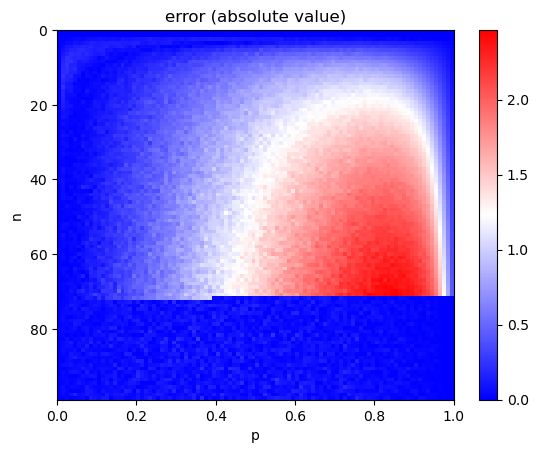

In [264]:
nmax=99
plt.imshow(np.abs((data_sim-data_while))[:nmax+1], cmap='bwr', 
           #vmin=-1, vmax=2,
           extent=[0,1,nmax,0], aspect='auto')
plt.xlabel('p')
plt.ylabel('n')
#plt.ylim([3,20])
plt.colorbar()
plt.title('error (absolute value)')
plt.savefig('error_abs_old.png')

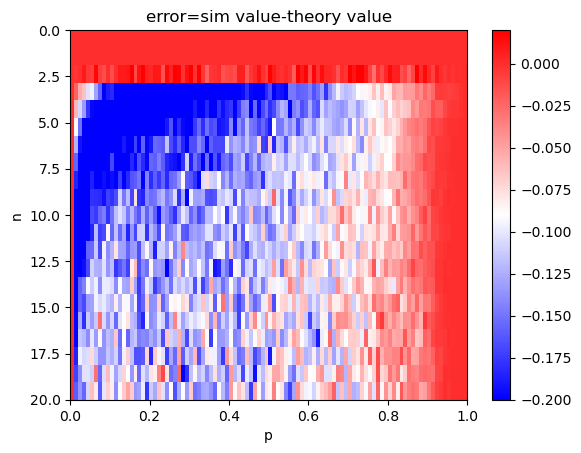

In [366]:
nmax=20
plt.imshow((data_sim-data_while)[:nmax+1], cmap='bwr', 
           vmin=-0.2, vmax=0.02,
           extent=[0,1,nmax,0], aspect='auto')
plt.xlabel('p')
plt.ylabel('n')
#plt.ylim([3,20])
plt.colorbar()
plt.title('error=sim value-theory value')
plt.savefig('error_old.png')

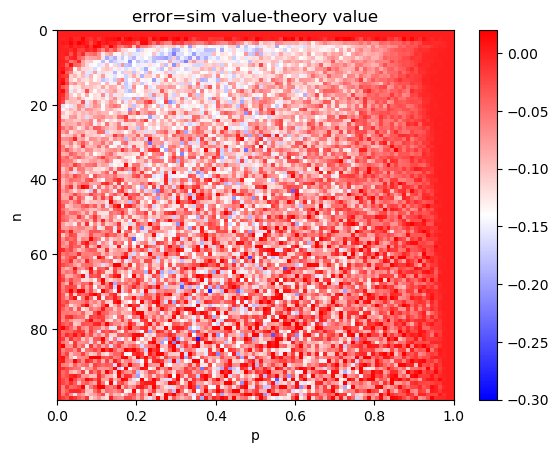

In [369]:
nmax=99
plt.imshow((data_sim-data_while2)[:nmax+1], cmap='bwr', 
           vmin=-0.3, vmax=0.02,
           extent=[0,1,nmax,0], aspect='auto')
plt.xlabel('p')
plt.ylabel('n')
#plt.ylim([3,20])
plt.colorbar()
plt.title('error=sim value-theory value')
plt.savefig('error_old.png')

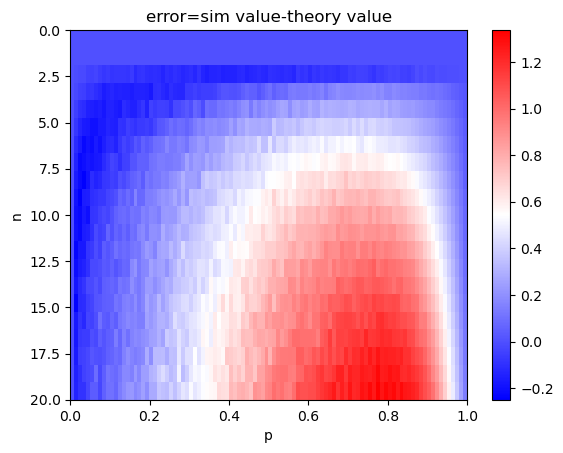

In [268]:
nmax=20
plt.imshow((data_sim-data_while)[:nmax+1], cmap='bwr', 
           #vmin=-1, vmax=2,
           extent=[0,1,nmax,0], aspect='auto')
plt.xlabel('p')
plt.ylabel('n')
#plt.ylim([3,20])
plt.colorbar()
plt.title('error=sim value-theory value')
plt.savefig('error_old.png')

In [194]:
G = nx.gnp_random_graph(10,0.1)
print(G.degree)
print([d[1] for d in G.degree])
print(max([d[1] for d in G.degree]))


[(0, 0), (1, 1), (2, 1), (3, 0), (4, 0), (5, 1), (6, 1), (7, 0), (8, 1), (9, 1)]
[0, 1, 1, 0, 0, 1, 1, 0, 1, 1]
1


0 0.0000 0.0000 0.0000
1 0.0000 0.0000 0.0000
2 0.0000 0.0960 0.0960
3 0.0297 0.3090 0.2793
4 0.1114 0.5780 0.4666
5 0.2544 0.8510 0.5966
6 0.4525 1.1880 0.7355
7 0.6874 1.4780 0.7906
8 0.9378 1.7190 0.7812
9 1.1880 1.9940 0.8060
10 1.4315 2.2250 0.7935
11 1.6682 2.5230 0.8548
12 1.8999 2.7790 0.8791
13 2.1276 3.0720 0.9444
14 2.3514 3.2250 0.8736
15 2.5710 3.3970 0.8260
16 2.7868 3.6460 0.8592
17 2.9995 3.9550 0.9555
18 3.2095 4.0680 0.8585
19 3.4170 4.3480 0.9310
20 3.6219 4.5230 0.9011
21 3.8245 4.7190 0.8945
22 4.0248 4.9080 0.8832
23 4.2232 5.0810 0.8578
24 4.4198 5.3120 0.8922
25 4.6147 5.5430 0.9283
26 4.8079 5.7070 0.8991
27 4.9994 5.8720 0.8726
28 5.1895 6.1060 0.9165
29 5.3781 6.3130 0.9349
30 5.5655 6.4730 0.9075
31 5.7515 6.6140 0.8625
32 5.9364 6.8680 0.9316
33 6.1200 6.9680 0.8480
34 6.3026 7.2240 0.9214
35 6.4840 7.3840 0.9000
36 6.6645 7.5930 0.9285
37 6.8440 7.7800 0.9360
38 7.0225 7.9030 0.8805
39 7.2001 8.0970 0.8969


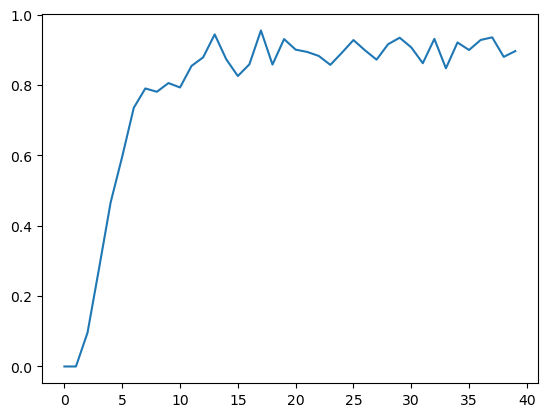

In [211]:
out = []
for n in range(40):
    a = get_expected_maximum_degree(n,0.1)
    b = sim_maximum_degree(n,0.1)
    out += [b-a]
    print(n, '{:.4f}'.format(a),
          '{:.4f}'.format(b), 
          '{:.4f}'.format(b-a))
    
plt.plot(range(40), out)

0.0

In [ ]:
# test spectrum of the adjacency matrix: Dane Taylor + Peter Mucha + undergrad entropy